# import

In [13]:
from astropy.io import fits
import time
#import urllib2# python2
import urllib#python3

import datetime
#from itertools import ifilter python2
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET
import h5py
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import bibtexparser
import astropy.coordinates as coord
from astropy import units as u
from astropy.coordinates import SkyCoord

pd.set_option('mode.chained_assignment','warn')

In [14]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

# convert time

In [124]:
from astropy.time import Time
from astropy.io import fits
import time
import datetime
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [4]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

#coords=[SDSS_RG_18286['RAhour'][:10],SDSS_RG_18286['DEdeg'][:10]]
#c = SkyCoord(coords, frame=FK5, unit=(u.hourangle, u.deg))

## astroquery.heasarc

In [2]:
from astroquery.heasarc import Heasarc
heasarc = Heasarc()
table = heasarc.query_mission_list()
table.pprint() 

 Mission   ...
---------- ...
     AGILE ...
     AGILE ...
     AKARI ...
     AKARI ...
       ANS ...
   ARIEL V ...
   ARIEL V ...
      ASCA ...
      ASCA ...
      ASCA ...
       ... ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
XMM-NEWTON ...
Length = 1170 rows


In [3]:
mission_table=table.to_pandas()

mission_table['Mission']

mission_table[mission_table['Mission'].str.contains('ztf')]

In [8]:
mission_table[mission_table['Mission'].str.contains('NUSTAR')]

,Mission,Table,Table Description
571,NUSTAR,nuaftl,NuSTAR As-Flown Timeline
572,NUSTAR,nucosmosfc,NuSTAR COSMOS Field X-Ray Source Catalog
573,NUSTAR,nuecdfscat,NuSTAR Survey of Extended Chandra Deep Field S...
574,NUSTAR,nugalcen,NuSTAR Hard X-Ray Survey of the Galactic Center
575,NUSTAR,numaster,NuSTAR Master Catalog
576,NUSTAR,nustarssc,NuSTAR Serendipitous Survey 40-Month Primary S...
577,NUSTAR,nustarssc2,NuSTAR Serendipitous Survey 40-Month Secondary...


In [102]:
mission_table[mission_table['Mission'].str.contains('SWIFT')]

,Mission,Table,Table Description
1028,SWIFT,sacshpscat,Swift AGN & Cluster Survey (SACS) Hard-Band (2...
1029,SWIFT,sacssescat,Swift AGN & Cluster Survey (SACS) Soft-Band (0...
1030,SWIFT,sacsspscat,Swift AGN & Cluster Survey (SACS) Soft-Band (0...
1031,SWIFT,sacstpscat,Swift AGN & Cluster Survey (SACS) Total-Band (...
1032,SWIFT,sixsrvycat,Swift-INTEGRAL X-Ray (SIX) Survey Catalog
1033,SWIFT,swbat105m,Swift-BAT 105-Month All-Sky Hard X-Ray Survey
1034,SWIFT,swbatagn60,Swift BAT 60-Month Survey of Active Galactic N...
1035,SWIFT,swbatmontr,Swift BAT Transient Monitoring Catalog
1036,SWIFT,swbatsfxt,Swift BAT 100-Month Supergiant Fast X-Ray Tran...
1037,SWIFT,swif1swxrt,The Seven-Year Swift-XRT Point Source Catalog ...


In [93]:
table?

# CLAGN list

In [129]:
CLAGN_list_1=pd.read_excel('/Volumes/ExtremeSSD/Survey_fits//CLAGN-20220609.xlsx',sheet_name='Sheet1')
CLAGN_list_2=pd.read_excel('/Volumes/ExtremeSSD/Survey_fits//CLAGN-20220609.xlsx',sheet_name='Sheet2')

In [130]:
#coords=[CLAGN_list_1['RA'],CLAGN_list_1['DEC']]
coord = SkyCoord(ra=CLAGN_list_1['RA'],dec=CLAGN_list_1['DEC'], frame=ICRS, unit=u.deg)

In [131]:
CLAGN_list_1['radeg']=coord.ra.deg
CLAGN_list_1['decdeg']=coord.dec.deg

In [132]:
CLAGN_list_1['Name']

0                        1ES 1927+654
1                         1H 0419-577
2      2MASS J01264811-0839481       
3             2MASS J07451198+3809114
4             2MASS J09270231+0433080
                    ...              
135         WISEA J154529.63+251127.9
136         WISEA J155017.23+413902.4
137         WISEA J155258.27+273728.5
138         WISEA J162415.02+455130.2
139                         NGC 6890 
Name: Name, Length: 140, dtype: object

CLAGN_list_1[['Name','radeg','decdeg','Redshift']].to_csv('/Users/brettlv/Downloads/CLAGN_220609.csv',index=False)

mv CLAGN_220609.csv /Users/brettlv/Downloads/

## CLAGN_NUSTAR

In [9]:
CLAGN_OX_list=['ESO 362-G18', 'NGC 2992', 'NGC 4151', 'NGC 4395', 'NGC 7582']

mkdir /Users/brettlv/Downloads/CLAGN_Nustar

In [15]:
mission = 'numaster' #'rosmaster'
for i in CLAGN_OX_list:
    object_name = i.strip()
    save_name=i.strip().replace(' ','')
    save_path='/Users/brettlv/Downloads/CLAGN_Nustar/%s.csv'%save_name
    
    if not os.path.exists(save_path): 
        try:
            table = heasarc.query_object(object_name, mission=mission,)# radius='24 arcmin' for swiftmastr
            if len(table)>0:
                table.to_pandas().to_csv(save_path,index=None)
                time.sleep(1+np.random.randint(2,5)) 
            else:
                print("\nno matching at: " + i + "\n")  
        
        except urllib.error.HTTPError or urllib.error.URLError:

            print("\nPassed a error at: " + i + "\n")
            time.sleep(5+np.random.randint(5,10))     

## CLAGN SWIFT

In [117]:
mission = 'swiftmastr' #'rosmaster'
object_name = '3c273'
table = heasarc.query_object(object_name, mission=mission,)# radius='24 arcmin' for swiftmastr
#table[:3].pprint(max_width=120)

table

mkdir /Users/brettlv/Downloads/CLAGN_Swift

In [111]:
table.to_pandas().to_csv('/Users/brettlv/Downloads/CLAGN_Swift/%s.csv'%object_name,index=None)

In [108]:
print(table.colnames)

['NAME', 'OBSID', 'RA', 'DEC', 'START_TIME', 'PROCESSING_DATE', 'XRT_EXPOSURE', 'UVOT_EXPOSURE', 'BAT_EXPOSURE', 'ARCHIVE_DATE', 'SEARCH_OFFSET_']


## example 1ES 1927+654

wget -q -nH --no-check-certificate --cut-dirs=5 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/swift/data/obs/2018_07//00010682005/

b'AT2018ZF    '	b'00010682005'	291.7988	65.56271	58323.03677	58333	2288.458	2238.106	2302	58334	b'0.822 (1ES 1927+654)\n'

In [125]:
convert_date_single(58323.03677)

datetime.datetime(2018, 7, 24, 0, 52, 56, 928000)

In [ ]:
58323.03677

In [122]:
mission = 'swiftmastr' #'rosmaster'
for i in CLAGN_list_1['Name']:
    object_name = i.strip()
    save_name=i.strip().replace(' ','')
    save_path='/Users/brettlv/Downloads/CLAGN_Swift/%s.csv'%save_name
    
    if not os.path.exists(save_path): 
        try:
            table = heasarc.query_object(object_name, mission=mission,)# radius='24 arcmin' for swiftmastr
            if len(table)>0:
                table.to_pandas().to_csv(save_path,index=None)
                time.sleep(1+np.random.randint(2,5)) 
            else:
                print("\nno matching at: " + i + "\n")  
        
        except urllib.error.HTTPError or urllib.error.URLError:

            print("\nPassed a error at: " + i + "\n")
            time.sleep(5+np.random.randint(5,10))     


no matching at: WISEA J162415.02+455130.2



for i in CLAGN_list_1['Name']:
    object_name = i.strip()
    save_name=i.strip().replace(' ','')
    origin_path='/Users/brettlv/Downloads/CLAGN_Swift/%s.csv'%i
    save_path='/Users/brettlv/Downloads/CLAGN_Swift/%s.csv'%save_name
    if os.path.exists(origin_path):   
        os.rename(origin_path,save_path)
        


In [128]:
CLAGN_list_1.columns

Index(['Name', 'RA', 'DEC', 'Ref.', 'Type_Ref', 'Redshift', 'lg(MBH/Msun)',
       'Ref..1', 'mass_Ref', 'Type_CL', 'Type_X', 'OX', 'logM', 'pos',
       'E(B-V)mean', 'E(B-V)weighted', 'NHImean', 'NHIweighted', 'NH2mean',
       'NH2weighted', 'NH,totmean', 'NH,totweighted', 'radeg', 'decdeg'],
      dtype='object')

In [141]:
print('type name Swift_obs_num')

for index,i in enumerate(CLAGN_list_1['Name']):
    object_name = i.strip()
    save_name=i.strip().replace(' ','')
    save_path='/Users/brettlv/Downloads/CLAGN_Swift/%s.csv'%save_name
    
    if os.path.exists(save_path):
        if os.path.getsize(save_path)>100: 
            obs_info=pd.read_csv(save_path)
            if len(obs_info)>10:
                print(CLAGN_list_1.loc[index,'OX'],save_name,len(obs_info))
        #else:       
            #print('no obs for %(save_name)s'% locals() )
        

type name Swift_obs_num
 A  1ES1927+654 34
 B  1H0419-577 16
 A  2MASSJ12335916+0842112 14
 A  2MASSJ14284671+1723530 14
 A  2MASSJ14345529+5723449 13
 A  2MASSJ16011122+4745095 29
 A  2MASXJ11180325+4506463 44
 A  3C390.3 15
 A  ESO362-G18 46
 A  Fairall9 817
 A  HE1136-2304 38
 A  IRAS23226-3843 51
 A  Mrk1018 71
 A  Mrk530 102
 A  Mrk590 227
 A  Mrk6 102
 A  NGC1097 58
 B  NGC1365 145
 A  NGC1566 250
 A  NGC2617 312
 A  NGC2992 131
 A  NGC3516 184
 B  NGC4051 82
 A  NGC4151 508
 B  NGC4388 28
 A  NGC4395 261
 B  NGC4507 74
 B  NGC4939 221
 A  NGC5548 916
 B  NGC6300 11
 A  NGC7582 15
 B  NGC7674 26
 A  SDSSJ030510.60-010431.6 25
 A  SDSSJ080020.98+263648.8 13
 A  SDSSJ081319.34+460849.5 31
 A  SDSSJ082942.67+415436.9 28
 A  SDSSJ111536.57+054449.7 13
 A  SDSSJ153308.02+443208.4 27
 A  SDSSJ172322.31+550413.8 57
 A  SDSSJ104705.16+544405.8 33
 A  WISEAJ004339.35+134436.3 12
 A  WISEAJ154507.52+170950.8 16
 B  NGC6890 15


# SDSS

dr=17
IMAGING_URL_SUFFIX = '{base}/dr{dr}/{instrument}/photoObj/frames/{rerun}/{run}/{camcol}/frame-{band}-{run:06d}-{camcol}-{field:04d}.fits.bz2'
QUERY_URL_SUFFIX_DR_10 = '/dr{dr}/en/tools/search/x_sql.aspx'
QUERY_URL_SUFFIX_DR_NEW = '/dr{dr}/en/tools/search/x_results.aspx'
QUERY_URL_SUFFIX_DR_OLD = '/dr{dr}/en/tools/search/x_sql.asp'
SPECTRA_URL_SUFFIX = '{base}/dr{dr}/sdss/spectro/redux/{run2d}/spectra/{plate:0>4d}/spec-{plate:0>4d}-{mjd}-{fiber:04d}.fits'
TEMPLATES_URL = 'http://classic.sdss.org/dr7/algorithms/spectemplates/spDR2'
TIMEOUT = 60
XID_URL_SUFFIX_DR_10 = '/dr{dr}/en/tools/crossid/x_crossid.aspx'
XID_URL_SUFFIX_NEW = '/dr{dr}/en/tools/search/X_Results.aspx'
XID_URL_SUFFIX_OLD = '/dr{dr}/en/tools/crossid/x_crossid.asp'¶

## [fetch_sdss_spectrum and plot](https://astroquery.readthedocs.io/en/latest/api/astroquery.sdss.SDSSClass.html#astroquery.sdss.SDSSClass.get_spectra)

[========================================]  182.8kb / 182.8kb   
caching to /Users/brettlv/astroML_data/SDSSspec/1615/spSpec-53166-1615-513.fit


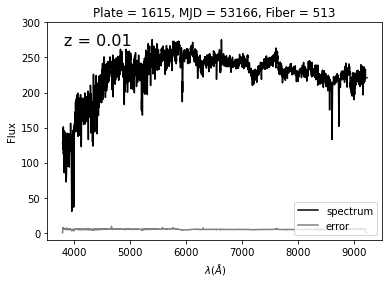

In [16]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#------------------------------------------------------------
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

ax.legend(loc=4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()

for index, (plate, mjd, fiberid,name) in enumerate(zip(CLAGN_SDSSDR17_nearest_spec['plate'],\
                                                  CLAGN_SDSSDR17_nearest_spec['mjd'],\
                                                  CLAGN_SDSSDR17_nearest_spec['fiberid'],\
                                                  CLAGN_SDSSDR17_nearest_spec['Name'])):
    print(plate)

## plot_CLAGN_spec

Downloaded 1 spectra(s) ! 
Downloaded 2 spectra(s) ! 
Downloaded 3 spectra(s) ! 
Downloaded 4 spectra(s) ! 


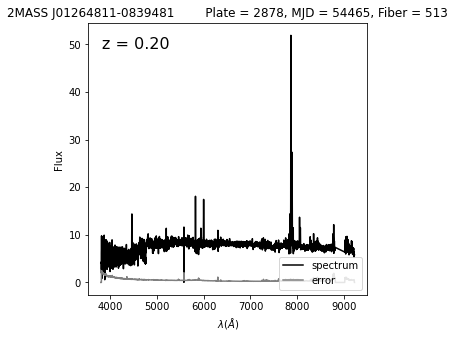

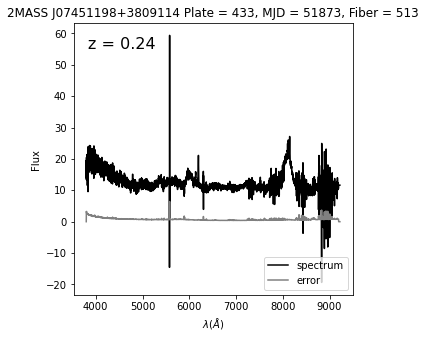

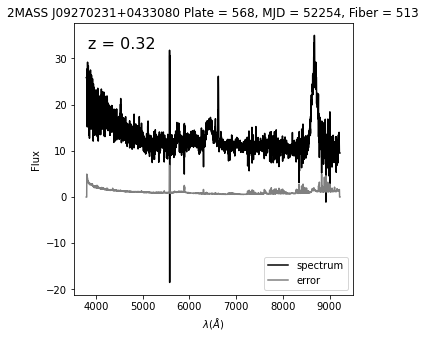

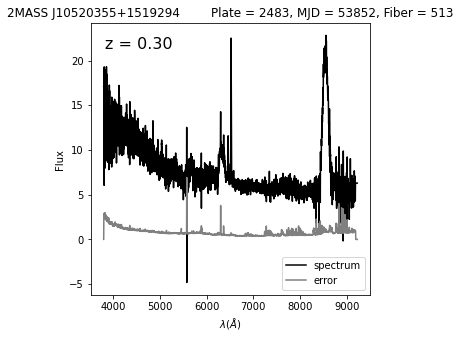

In [85]:
spec_i = 0
warn_d = 0

for index, (plate, mjd, fiberid,name) in enumerate(zip(CLAGN_SDSSDR17_nearest_spec['plate'],\
                                                  CLAGN_SDSSDR17_nearest_spec['mjd'],\
                                                  CLAGN_SDSSDR17_nearest_spec['fiberid'],\
                                                  CLAGN_SDSSDR17_nearest_spec['Name'])):

    try:
        if plate < 3000 and index < 5:
            spec = fetch_sdss_spectrum(round(plate), round(mjd), round(fiberid))  
            spec_i = spec_i + 1
            print("Downloaded " + str(spec_i) + " spectra(s) ! ")
            
            fig = plt.figure(figsize=(5,5))
            fig.subplots_adjust(hspace=0.0, wspace = 0.0)
            ax = fig.add_subplot(111)
            ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
            ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')

            ax.legend(loc=4)

            ax.set_title('%(name)s Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i'% locals())

            ax.text(0.05, 0.95, 'z = %.2f'%spec.z, size=16,ha='left', va='top', transform=ax.transAxes)

            ax.set_xlabel(r'$\lambda (\AA)$')
            ax.set_ylabel('Flux')
            #ax.set_ylim(-10, 300)
            plt.savefig('%s_SDSS_spec.png'%name,dpi=400, transparent=False, bbox_inches='tight')
            
    except urllib.error.HTTPError or urllib.error.URLError:
        warn_d = warn_d + 1
        spec_i = spec_i + 1
        print("\nPassed a error at: " + str(spec_i) + "\n")           
            

In [62]:
ls /Users/brettlv/astroML_data/SDSSspec/1615/* 

/Users/brettlv/astroML_data/SDSSspec/1615/spSpec-53166-1615-513.fit


In [20]:
import sys
from urllib.error import HTTPError
import numpy as np
from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets.tools import query_plate_mjd_fiber, TARGET_GALAXY
from astroML.dimensionality import iterative_pca

In [21]:
query_plate_mjd_fiber?

# [Example of downloading and processing SDSS spectra](http://www.astroml.org/examples/datasets/compute_sdss_pca.html)

#Author: Jake VanderPlas <vanderplas@astro.washington.edu>
#License: BSD
#The figure is an example from astroML: see http://astroML.github.com
import sys
from urllib.error import HTTPError
import numpy as np
from astroML.datasets import fetch_sdss_spectrum
from astroML.datasets.tools import query_plate_mjd_fiber, TARGET_GALAXY
from astroML.dimensionality import iterative_pca


def fetch_and_shift_spectra(n_spectra,
                            outfile,
                            primtarget=TARGET_GALAXY,
                            zlim=(0, 0.7),
                            loglam_start=3.5,
                            loglam_end=3.9,
                            Nlam=1000):
    """
    This function queries CAS for matching spectra, and then downloads
    them and shifts them to a common redshift binning
    """
    # First query for the list of spectra to download
    plate, mjd, fiber = query_plate_mjd_fiber(n_spectra, primtarget,
                                              zlim[0], zlim[1])

    # Set up arrays to hold information gathered from the spectra
    spec_cln = np.zeros(n_spectra, dtype=np.int32)
    lineindex_cln = np.zeros(n_spectra, dtype=np.int32)

    log_NII_Ha = np.zeros(n_spectra, dtype=np.float32)
    log_OIII_Hb = np.zeros(n_spectra, dtype=np.float32)

    z = np.zeros(n_spectra, dtype=np.float32)
    zerr = np.zeros(n_spectra, dtype=np.float32)
    spectra = np.zeros((n_spectra, Nlam), dtype=np.float32)
    mask = np.zeros((n_spectra, Nlam), dtype=bool)

    # Calculate new wavelength coefficients
    new_coeff0 = loglam_start
    new_coeff1 = (loglam_end - loglam_start) / Nlam

    # Now download all the needed spectra, and resample to a common
    #  wavelength bin.
    n_spectra = len(plate)
    num_skipped = 0
    i = 0

    while i < n_spectra:
        sys.stdout.write(' %i / %i spectra\r' % (i + 1, n_spectra))
        sys.stdout.flush()
        try:
            spec = fetch_sdss_spectrum(plate[i], mjd[i], fiber[i])
        except HTTPError:
            num_skipped += 1
            print("%i, %i, %i not found" % (plate[i], mjd[i], fiber[i]))
            i += 1
            continue

        spec_rebin = spec.restframe().rebin(new_coeff0, new_coeff1, Nlam)

        if np.all(spec_rebin.spectrum == 0):
            num_skipped += 1
            print("%i, %i, %i is all zero" % (plate[i], mjd[i], fiber[i]))
            i += 1
            continue

        spec_cln[i] = spec.spec_cln

        lineindex_cln[i], (log_NII_Ha[i], log_OIII_Hb[i])\
            = spec.lineratio_index()

        z[i] = spec.z
        zerr[i] = spec.zerr

        spectra[i] = spec_rebin.spectrum
        mask[i] = spec_rebin.compute_mask(0.5, 5)

        i += 1
    sys.stdout.write('\n')

    N = i
    print("   %i spectra skipped" % num_skipped)
    print("   %i spectra processed" % N)
    print("saving to %s" % outfile)

    np.savez(outfile,
             spectra=spectra[:N],
             mask=mask[:N],
             coeff0=new_coeff0,
             coeff1=new_coeff1,
             spec_cln=spec_cln[:N],
             lineindex_cln=lineindex_cln[:N],
             log_NII_Ha=log_NII_Ha[:N],
             log_OIII_Hb=log_OIII_Hb[:N],
             z=z[:N],
             zerr=zerr[:N])


def spec_iterative_pca(outfile, n_ev=10, n_iter=20, norm='L2'):
    """
    This function takes the file outputted above, performs an iterative
    PCA to fill in the gaps, and appends the results to the same file.
    """
    data_in = np.load(outfile)
    spectra = data_in['spectra']
    mask = data_in['mask']

    res = iterative_pca(spectra, mask,
                        n_ev=n_ev, n_iter=n_iter, norm=norm,
                        full_output=True)

    input_dict = {key: data_in[key] for key in data_in.files}

    # don't save the reconstructed spectrum: this can easily
    # be recomputed from the other parameters.
    input_dict['mu'] = res[1]
    input_dict['evecs'] = res[2]
    input_dict['evals'] = res[3]
    input_dict['norms'] = res[4]
    input_dict['coeffs'] = res[5]

    np.savez(outfile, **input_dict)


if __name__ == '__main__':
    fetch_and_shift_spectra(4000, 'spec4000.npz')
    spec_iterative_pca('spec4000.npz')

## SDSS Spectroscopic Galaxy Sample

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_specgals

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch spectroscopic galaxy data
data = fetch_sdss_specgals()
data = data[:1000]

u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

#------------------------------------------------------------
# Plot the galaxy colors and magnitudes
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(u - r, rPetro, '.k', markersize=2)

ax.set_xlim(1, 4.5)
ax.set_ylim(18.1, 13.5)

ax.set_xlabel(r'$\mathrm{u - r}$')
ax.set_ylabel(r'$\mathrm{r_{petrosian}}$')

plt.show()

# CLAGN_SDSS

## nearest

In [53]:
CLAGN_SDSS_nearest=pd.read_csv('/Volumes/ExtremeSSD/Survey_fits/MyTable_CL_spec_Nearest_mjd_name.csv')

CLAGN_SDSS_nearest

In [55]:
CLAGN_SDSS_nearest_spec=CLAGN_SDSS_nearest[CLAGN_SDSS_nearest['mjd'].notnull()]
CLAGN_SDSS_nearest_spec=drop_index(CLAGN_SDSS_nearest_spec)

In [56]:
CLAGN_SDSS_nearest_spec

,Name,ra1,Dec-01,z1,distance,ra2,Dec-02,z2,mjd,plate,fiberid
0,2MASS J01264811-0839481,21.70037,-8.663356,0.19791,0.000545,21.700339,-8.663331,0.197913,54465.0,2878.0,377.0
1,2MASS J07451198+3809114,116.29990,38.153140,0.23648,0.000517,116.299930,38.153136,0.236480,51873.0,433.0,178.0
2,2MASS J09270231+0433080,141.75960,4.552278,0.32179,0.000350,141.759620,4.552281,0.321794,52254.0,568.0,524.0
3,2MASS J10022021+4509276,150.58410,45.157600,0.40090,0.001069,150.584080,45.157586,0.400862,56683.0,7284.0,122.0
4,2MASS J10520355+1519294,163.01480,15.324890,0.30250,0.000150,163.014800,15.324888,0.302501,53852.0,2483.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...
105,WISEA J154507.52+170950.8,236.28140,17.164160,0.04832,0.000616,236.281350,17.164163,0.048325,53889.0,2167.0,139.0
106,WISEA J154529.63+251127.9,236.37350,25.191070,0.11696,0.000430,236.373500,25.191071,0.116963,53846.0,1849.0,56.0
107,WISEA J155017.23+413902.4,237.57180,41.650650,0.22014,0.000740,237.571790,41.650638,0.220142,52468.0,1053.0,117.0
108,WISEA J155258.27+273728.5,238.24290,27.624560,0.08648,0.001417,238.242920,27.624557,0.086478,53498.0,1654.0,603.0


## nearby

In [48]:
CLAGN_SDSS_nearby=pd.read_csv('/Volumes/ExtremeSSD/Survey_fits/MyTable_CL_spec_Nearby_mjd_brettlv.csv')

In [49]:
CLAGN_SDSS_nearby_spec=CLAGN_SDSS_nearby[CLAGN_SDSS_nearby['mjd'].notnull()]
CLAGN_SDSS_nearby_spec=drop_index(CLAGN_SDSS_nearby_spec)

CLAGN_SDSS_nearby_spec

## DR17

In [51]:
CLAGN_SDSSDR17_nearest=pd.read_csv('/Volumes/ExtremeSSD/Survey_fits/MyTable_CL_spec_Nearest_DR17_name.csv')

CLAGN_SDSSDR17_nearest_spec=CLAGN_SDSSDR17_nearest[CLAGN_SDSSDR17_nearest['mjd'].notnull()]

CLAGN_SDSSDR17_nearest_spec=drop_index(CLAGN_SDSSDR17_nearest_spec)

In [81]:
max(CLAGN_SDSSDR17_nearest_spec['plate'])

11042.0

In [52]:
CLAGN_SDSSDR17_nearest_spec

,Name,ra1,Dec-01,z1,distance,ra2,Dec-02,z2,mjd,plate,fiberid
0,2MASS J01264811-0839481,21.70037,-8.663356,0.19791,0.000545,21.700339,-8.663331,0.197913,54465.0,2878.0,377.0
1,2MASS J07451198+3809114,116.29990,38.153140,0.23648,0.000517,116.299930,38.153136,0.236480,51873.0,433.0,178.0
2,2MASS J09270231+0433080,141.75960,4.552278,0.32179,0.000350,141.759620,4.552281,0.321794,52254.0,568.0,524.0
3,2MASS J10022021+4509276,150.58410,45.157600,0.40090,0.001069,150.584080,45.157586,0.400862,56683.0,7284.0,122.0
4,2MASS J10520355+1519294,163.01480,15.324890,0.30250,0.000150,163.014800,15.324888,0.302501,53852.0,2483.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...
105,WISEA J154507.52+170950.8,236.28140,17.164160,0.04832,0.000616,236.281350,17.164163,0.048325,53889.0,2167.0,139.0
106,WISEA J154529.63+251127.9,236.37350,25.191070,0.11696,0.000430,236.373500,25.191071,0.116963,53846.0,1849.0,56.0
107,WISEA J155017.23+413902.4,237.57180,41.650650,0.22014,0.000740,237.571790,41.650638,0.220142,52468.0,1053.0,117.0
108,WISEA J155258.27+273728.5,238.24290,27.624560,0.08648,0.001417,238.242920,27.624557,0.086478,53498.0,1654.0,603.0


# downlaod_SDSS_Spectrum

In [87]:
import numpy as np
from pandas import DataFrame, read_csv
from astroML.datasets import fetch_sdss_spectrum
import urllib
import pickle
from astropy.time import Time
from astropy.io import fits
import time
import datetime

#time.sleep(10+np.random.randint(5,10)) 

#Read CSV to Dataframe

print("Loading csv files...\n")


all_label = []
all_data = []
spec_i = 0
warn_d = 0


for index, (plate, mjd, fiberid,name) in enumerate(zip(CLAGN_SDSSDR17_nearest_spec['plate'],\
                                                  CLAGN_SDSSDR17_nearest_spec['mjd'],\
                                                  CLAGN_SDSSDR17_nearest_spec['fiberid'],\
                                                  CLAGN_SDSSDR17_nearest_spec['Name'])):
    try:
        if  index < 15:
            spec = fetch_sdss_spectrum(round(plate), round(mjd), round(fiberid))
            data_list = [spec.hdulist.filename(),name]
            print(spec.hdulist.filename(),name,plate)
            all_data.append(data_list)
            spec_i = spec_i + 1
            print("Downloaded " + str(spec_i) + " spectra(s) ! ")
            time.sleep(1+np.random.randint(2,5)) 
            
    except urllib.error.HTTPError or urllib.error.URLError:
        warn_d = warn_d + 1
        spec_i = spec_i + 1
        print("\nPassed a error at: " + str(spec_i) + "\n")
        time.sleep(5+np.random.randint(5,10)) 

print("\nTried to download: " + str(spec_i) + " spectra(s).")
if warn_d > 0:
    warn_d = str(warn_d)
    print("Warning: " + warn_d + " spectra(s) failed to download !\n")
else:
    print("And there's no error.\n")
print("Completed!\n")

#Store the data to pickle file



Loading csv files...

/Users/brettlv/astroML_data/SDSSspec/2878/spSpec-54465-2878-377.fit 2MASS J01264811-0839481        2878.0
Downloaded 1 spectra(s) ! 
/Users/brettlv/astroML_data/SDSSspec/0433/spSpec-51873-0433-178.fit 2MASS J07451198+3809114 433.0
Downloaded 2 spectra(s) ! 
/Users/brettlv/astroML_data/SDSSspec/0568/spSpec-52254-0568-524.fit 2MASS J09270231+0433080 568.0
Downloaded 3 spectra(s) ! 

Passed a error at: 4

/Users/brettlv/astroML_data/SDSSspec/2483/spSpec-53852-2483-204.fit 2MASS J10520355+1519294        2483.0
Downloaded 5 spectra(s) ! 
/Users/brettlv/astroML_data/SDSSspec/1012/spSpec-52649-1012-216.fit 2MASS J11132967+5313393 1012.0
Downloaded 6 spectra(s) ! 
/Users/brettlv/astroML_data/SDSSspec/1628/spSpec-53474-1628-328.fit 2MASS J12335916+0842112 1628.0
Downloaded 7 spectra(s) ! 
/Users/brettlv/astroML_data/SDSSspec/2760/spSpec-54506-2760-588.fit 2MASS J14284671+1723530        2760.0
Downloaded 8 spectra(s) ! 

Passed a error at: 9

/Users/brettlv/astroML_data/SDS

mkdir data

In [65]:
with open('./data/listfile_5.data', 'wb') as filehandle: 
    # store the data as binary data stream
    pickle.dump(all_data, filehandle)

cat ./data/listfile_5.data